# 1. Loading the data :

In [1]:
import numpy as np 
import pandas as pd 
import nltk   
import matplotlib.pyplot as plt           
import random 
import os
from collections import Counter 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import re                                  
import string                              
from nltk.corpus import stopwords          
from nltk.stem import PorterStemmer        
from nltk.tokenize import word_tokenize   
from sklearn.feature_extraction.text import TfidfVectorizer 
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [2]:
df_clickbait = pd.read_excel('clickbait_data.xlsx')
df_clickbait.head()

,Title
0,Should I Get Bings
1,Which TV Female Friend Group Do You Belong In
2,"The New ""Star Wars: The Force Awakens"" Trailer..."
3,"This Vine Of New York On ""Celebrity Big Brothe..."
4,A Couple Did A Stunning Photo Shoot With Their...


In [3]:
df_non_clickbait = pd.read_excel('non-clickbait_data.xlsx')
df_non_clickbait.head()

,Title
0,Bill Changing Credit Card Rules Is Sent to Oba...
1,"In Hollywood, the Easy-Money Generation Toughe..."
2,1700 runners still unaccounted for in UK's Lak...
3,Yankees Pitchers Trade Fielding Drills for Put...
4,Large earthquake rattles Indonesia; Seventh in...


In [4]:
df_clickbait["Class"] = 1 
df_non_clickbait["Class"] = 0

In [5]:
 df_clickbait.shape, df_non_clickbait.shape

((15999, 2), (16001, 2))

In [6]:
df = pd.concat([df_clickbait,df_non_clickbait], axis=0)
df

,Title,Class
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1
...,...,...
15996,"To Make Female Hearts Flutter in Iraq, Throw a...",0
15997,"British Liberal Democrat Patsy Calton, 56, die...",0
15998,Drone smartphone app to help heart attack vict...,0
15999,"Netanyahu Urges Pope Benedict, in Israel, to D...",0


In [7]:
df.shape

(32000, 2)

# 2. Preprocessing:
## 2.1 Removing punctuation and lower casing words

In [8]:
def remove_punctuation(text):
    return "".join(["" if ch in string.punctuation else ch.lower() for ch in text])

In [9]:
df['Title'] = df['Title'].apply(remove_punctuation)


In [10]:
df

,Title,Class
0,should i get bings,1
1,which tv female friend group do you belong in,1
2,the new star wars the force awakens trailer is...,1
3,this vine of new york on celebrity big brother...,1
4,a couple did a stunning photo shoot with their...,1
...,...,...
15996,to make female hearts flutter in iraq throw a ...,0
15997,british liberal democrat patsy calton 56 dies ...,0
15998,drone smartphone app to help heart attack vict...,0
15999,netanyahu urges pope benedict in israel to den...,0


## 2.2 Removing Numbers:

In [11]:
def remove_numbers(text):
    return "".join(["" if ch in string.digits else ch for ch in text])

In [12]:
df['Title'] = df['Title'].apply(remove_numbers)


In [13]:
df

,Title,Class
0,should i get bings,1
1,which tv female friend group do you belong in,1
2,the new star wars the force awakens trailer is...,1
3,this vine of new york on celebrity big brother...,1
4,a couple did a stunning photo shoot with their...,1
...,...,...
15996,to make female hearts flutter in iraq throw a ...,0
15997,british liberal democrat patsy calton dies of...,0
15998,drone smartphone app to help heart attack vict...,0
15999,netanyahu urges pope benedict in israel to den...,0


## 2.3 Tokenizing:

In [14]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aorus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
df['Title'] = df['Title'].apply(word_tokenize)


In [16]:
df

,Title,Class
0,"[should, i, get, bings]",1
1,"[which, tv, female, friend, group, do, you, be...",1
2,"[the, new, star, wars, the, force, awakens, tr...",1
3,"[this, vine, of, new, york, on, celebrity, big...",1
4,"[a, couple, did, a, stunning, photo, shoot, wi...",1
...,...,...
15996,"[to, make, female, hearts, flutter, in, iraq, ...",0
15997,"[british, liberal, democrat, patsy, calton, di...",0
15998,"[drone, smartphone, app, to, help, heart, atta...",0
15999,"[netanyahu, urges, pope, benedict, in, israel,...",0


## 2.4 Removing Stop words:

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aorus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
stopwords_english = set(stopwords.words('english'))
def clean_words(title):
    return [
    word for word in title
    if word not in stopwords_english
]

In [19]:
df['Title'] = df['Title'].apply(clean_words)

In [20]:
df

,Title,Class
0,"[get, bings]",1
1,"[tv, female, friend, group, belong]",1
2,"[new, star, wars, force, awakens, trailer, giv...",1
3,"[vine, new, york, celebrity, big, brother, fuc...",1
4,"[couple, stunning, photo, shoot, baby, learnin...",1
...,...,...
15996,"[make, female, hearts, flutter, iraq, throw, s...",0
15997,"[british, liberal, democrat, patsy, calton, di...",0
15998,"[drone, smartphone, app, help, heart, attack, ...",0
15999,"[netanyahu, urges, pope, benedict, israel, den...",0


## 2.5 Stemming:

In [21]:
stemmer = PorterStemmer()
def words_stems(title):
    return [
    stemmer.stem(word) for word in title
] 

In [22]:
df['Title'] =df['Title'].apply(words_stems)


In [23]:
df

,Title,Class
0,"[get, bing]",1
1,"[tv, femal, friend, group, belong]",1
2,"[new, star, war, forc, awaken, trailer, give, ...",1
3,"[vine, new, york, celebr, big, brother, fuck, ...",1
4,"[coupl, stun, photo, shoot, babi, learn, inope...",1
...,...,...
15996,"[make, femal, heart, flutter, iraq, throw, shoe]",0
15997,"[british, liber, democrat, patsi, calton, die,...",0
15998,"[drone, smartphon, app, help, heart, attack, v...",0
15999,"[netanyahu, urg, pope, benedict, israel, denou...",0


# Data Visualisation:

In [24]:
wordcloud = WordCloud().generate(str(df['Title']))

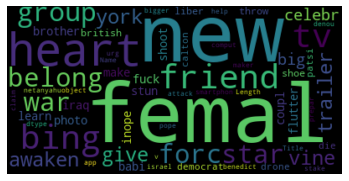

In [25]:
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [26]:
df_click = df[df['Class'] == 1]
wordcloud_click = WordCloud().generate(str(df_click['Title']))
        
    

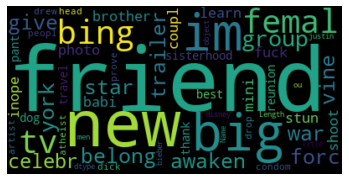

In [27]:
plt.imshow(wordcloud_click, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [28]:
df_non_click = df[df['Class'] == 0]
wordcloud_non_click = WordCloud().generate(str(df_non_click['Title']))

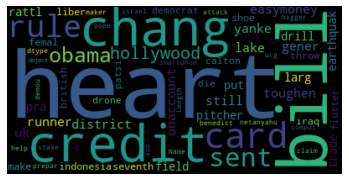

In [29]:
plt.imshow(wordcloud_non_click, interpolation = "bilinear")
plt.axis("off")
plt.show()

>## Building word-frequency dictionary:

In [30]:
bait_words = df.loc[df['Class'] == 1]
normal_words = df.loc[df['Class'] == 0]

In [31]:
bait_freq = dict(Counter([val for sublist in bait_words['Title']
                          for val in sublist]))
normal_freq = dict(Counter([val for sublist in normal_words['Title'] 
                            for val in sublist]))

In [32]:
bait_freq

{'get': 387,
 'bing': 7,
 'tv': 128,
 'femal': 30,
 'friend': 226,
 'group': 41,
 'belong': 61,
 'new': 442,
 'star': 232,
 'war': 141,
 'forc': 46,
 'awaken': 61,
 'trailer': 53,
 'give': 142,
 'chill': 54,
 'vine': 34,
 'york': 40,
 'celebr': 245,
 'big': 54,
 'brother': 28,
 'fuck': 135,
 'perfect': 173,
 'coupl': 133,
 'stun': 35,
 'photo': 343,
 'shoot': 21,
 'babi': 115,
 'learn': 61,
 'inoper': 1,
 'brain': 18,
 'tumor': 1,
 'flirt': 8,
 'queer': 18,
 'girl': 294,
 'without': 68,
 'make': 860,
 'total': 165,
 'fool': 6,
 'cute': 89,
 'thing': 1181,
 'distract': 1,
 'awkward': 54,
 'thanksgiv': 106,
 'disney': 217,
 'princess': 65,
 'florida': 12,
 'what': 199,
 'quot': 110,
 'lyric': 105,
 'best': 470,
 'describ': 24,
 'depress': 59,
 'natali': 8,
 'dormer': 5,
 'sam': 4,
 'claflin': 1,
 'play': 103,
 'game': 237,
 'see': 188,
 'theyd': 3,
 'actual': 631,
 'last': 65,
 'hunger': 22,
 'respons': 46,
 'indian': 79,
 'patriarchi': 7,
 'time': 820,
 'die': 61,
 'captain': 4,
 'ameri

In [33]:
baits = random.sample(list(bait_freq), 10)
normal = random.sample(list(normal_freq), 10)

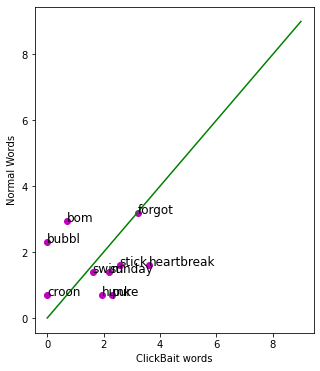

In [34]:
fig, ax = plt.subplots(figsize = (5 ,6))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([bait_freq[k] for k in baits])  

# do the same for the negative counts
y = np.log([normal_freq[x]+ 1 for x in normal]) 

data = list(zip(baits, normal))
# Plot a dot for each pair of words
ax.scatter(x, y, color ="m")  

# assign axis labels
plt.xlabel("ClickBait words")
plt.ylabel("Normal Words")

# Add the word as the label at the same position as you added the points just before
for i in range(len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12, )

ax.plot([0, 9], [0, 9], color = 'g') # Plot the line that divides the 2 areas.
plt.show()

# 3. Features' extraction:

In [35]:
df['bias'] = 1
df['bait'] = 0
df['normal'] = 0

In [36]:
def count_bait(headline):
    count = 0
    for word in headline:
        if word in bait_freq:
            count += bait_freq[word]
    return count
def count_normal(headline):
    count = 0
    for word in headline:
        if word in normal_freq:
            count += normal_freq[word]
    return count

In [37]:
df['bait'] = df['Title'].apply(count_bait)
df['normal'] =df['Title'].apply(count_normal)

In [38]:
df

,Title,Class,bias,bait,normal
0,"[get, bing]",1,1,394,112
1,"[tv, femal, friend, group, belong]",1,1,486,231
2,"[new, star, war, forc, awaken, trailer, give, ...",1,1,1171,1226
3,"[vine, new, york, celebr, big, brother, fuck, ...",1,1,1151,1084
4,"[coupl, stun, photo, shoot, babi, learn, inope...",1,1,728,186
...,...,...,...,...,...
15996,"[make, femal, heart, flutter, iraq, throw, shoe]",0,1,971,438
15997,"[british, liber, democrat, patsi, calton, die,...",0,1,154,771
15998,"[drone, smartphon, app, help, heart, attack, v...",0,1,267,608
15999,"[netanyahu, urg, pope, benedict, israel, denou...",0,1,20,338


In [39]:
df = shuffle(df)

In [40]:
df.head()


,Title,Class,bias,bait,normal
11511,"[unbeliv, rude, text, hangov]",1,1,112,10
8495,"[best, video, game, time]",1,1,1740,352
9580,"[harri, potter, parent, base, zodiac]",1,1,1371,76
783,"[chan, tatum, emo, guy, golden, globe, award]",1,1,390,59
2109,"[lawmak, seek, return, right, sue, devic, maker]",0,1,167,446


In [41]:
train_df = df[['Class','bias', 'bait', 'normal']]
X = train_df.drop(['Class'], axis=1)
y = train_df['Class']

In [42]:
seed=1234
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=seed)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(25600, 3) (25600,)
(6400, 3) (6400,)


# 4. Training  different models:

# Knn:

In [43]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
ytrain_pred = knn.predict(X_train) # predict on train set
y_pred_test = knn.predict(X_test) # predict on test set

In [45]:
acc_train = accuracy_score(y_train,ytrain_pred)
acc_test =accuracy_score(y_test, y_pred_test)
print(f"Train set: {acc_train}")
print(f"Test set: {acc_test}")

Train set: 0.920859375
Test set: 0.911875


### Confusion Matrix:

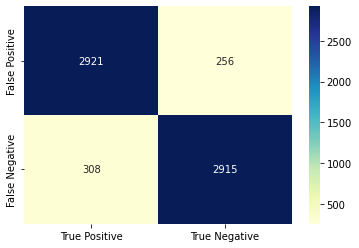

In [46]:
cm = confusion_matrix(y_test, y_pred_test)


cm_matrix = pd.DataFrame(data=cm, columns=['True Positive', 'True Negative'], 
                        index=['False Positive', 'False Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

### Classification Report:

In [47]:
print(classification_report(y_test, y_pred_test, 
                            target_names=['Non-clickbait', 'Clickbait']))

               precision    recall  f1-score   support

Non-clickbait       0.90      0.92      0.91      3177
    Clickbait       0.92      0.90      0.91      3223

     accuracy                           0.91      6400
    macro avg       0.91      0.91      0.91      6400
 weighted avg       0.91      0.91      0.91      6400



### AUC:

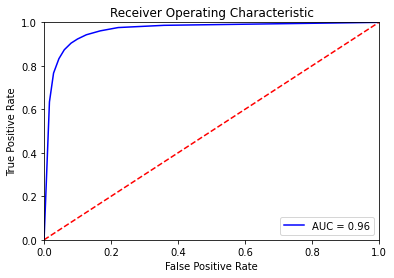

In [48]:
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Using cross validation:

In [49]:
# cross validation
scores = cross_val_score(knn, train_df, y, cv=5)
print ("Cross-validated scores for each fold :", scores)
print ("The mean accuracy of all 5 folds", scores.mean())

Cross-validated scores for each fold : [0.90984375 0.91171875 0.91578125 0.90984375 0.91359375]
The mean accuracy of all 5 folds 0.91215625


## Gaussian Naive Bayes:

In [50]:
gnb = GaussianNB() 
%time gnb.fit(X_train, y_train)

y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)
gnb_score =accuracy_score(y_test, y_pred_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",gnb_score)

CPU times: total: 0 ns
Wall time: 5.02 ms

Training Accuracy score: 0.8365625
Testing Accuracy score: 0.8328125


### Confusion Matrix:

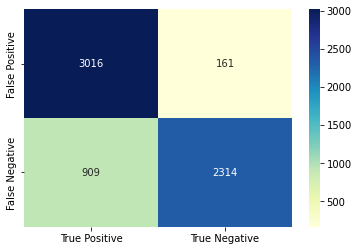

In [51]:
cm = confusion_matrix(y_test, y_pred_test)


cm_matrix = pd.DataFrame(data=cm, columns=['True Positive', 'True Negative'], 
                        index=['False Positive', 'False Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

### Classification Report:

In [52]:
print(classification_report(y_test, y_pred_test, 
                            target_names=['Non-clickbait', 'Clickbait']))

               precision    recall  f1-score   support

Non-clickbait       0.77      0.95      0.85      3177
    Clickbait       0.93      0.72      0.81      3223

     accuracy                           0.83      6400
    macro avg       0.85      0.83      0.83      6400
 weighted avg       0.85      0.83      0.83      6400



### AUC:

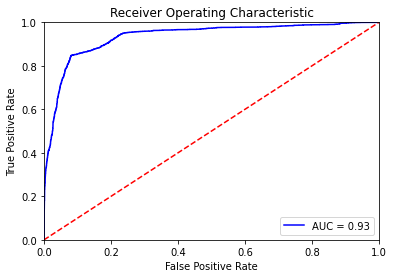

In [53]:
probs = gnb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Using cross validation:

In [54]:
# cross validation
scores = cross_val_score(gnb, train_df, y, cv=5)
print ("Cross-validated scores for each fold :", scores)
print ("The mean accuracy of all 5 folds", scores.mean())

Cross-validated scores for each fold : [1. 1. 1. 1. 1.]
The mean accuracy of all 5 folds 1.0


## Multinomial Naive Bayes:

In [55]:
mnb = MultinomialNB() 
%time mnb.fit(X_train, y_train)

y_pred_train = mnb.predict(X_train)
y_pred_test = mnb.predict(X_test)
mnb_score = accuracy_score(y_test, y_pred_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",mnb_score)

CPU times: total: 0 ns
Wall time: 5 ms

Training Accuracy score: 0.910546875
Testing Accuracy score: 0.911875


### Confusion Matrix:

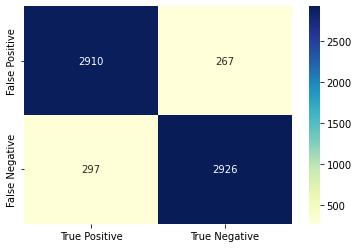

In [56]:
cm = confusion_matrix(y_test, y_pred_test)


cm_matrix = pd.DataFrame(data=cm, columns=['True Positive', 'True Negative'], 
                        index=['False Positive', 'False Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

### Classification Report:

In [57]:
print(classification_report(y_test, y_pred_test, 
                            target_names=['Non-clickbait', 'Clickbait']))

               precision    recall  f1-score   support

Non-clickbait       0.91      0.92      0.91      3177
    Clickbait       0.92      0.91      0.91      3223

     accuracy                           0.91      6400
    macro avg       0.91      0.91      0.91      6400
 weighted avg       0.91      0.91      0.91      6400



### AUC:

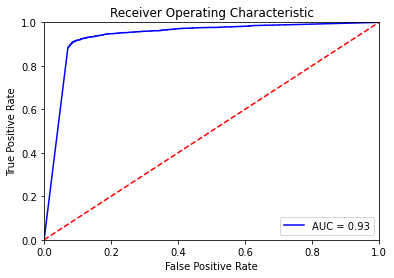

In [58]:
probs = mnb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Using cross validation:

In [59]:
# cross validation
scores = cross_val_score(mnb, train_df, y, cv=5)
print ("Cross-validated scores for each fold :", scores)
print ("The mean accuracy of all 5 folds", scores.mean())

Cross-validated scores for each fold : [0.9121875  0.913125   0.9134375  0.9140625  0.91328125]
The mean accuracy of all 5 folds 0.9132187500000001


## Decision Tree Classifier :

In [60]:
dt = DecisionTreeClassifier(random_state=seed)
%time dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
dt_score = accuracy_score(y_test, y_pred_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:", dt_score)

CPU times: total: 31.2 ms
Wall time: 40 ms

Training Accuracy score: 0.9982421875
Testing Accuracy score: 0.8746875


### Confusion Matrix:

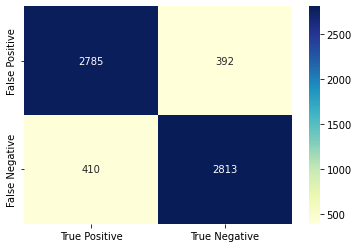

In [61]:
cm = confusion_matrix(y_test, y_pred_test)


cm_matrix = pd.DataFrame(data=cm, columns=['True Positive', 'True Negative'], 
                        index=['False Positive', 'False Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

### Classification Report:

In [62]:
print(classification_report(y_test, y_pred_test, 
                            target_names=['Non-clickbait', 'Clickbait']))

               precision    recall  f1-score   support

Non-clickbait       0.87      0.88      0.87      3177
    Clickbait       0.88      0.87      0.88      3223

     accuracy                           0.87      6400
    macro avg       0.87      0.87      0.87      6400
 weighted avg       0.87      0.87      0.87      6400



### AUC:

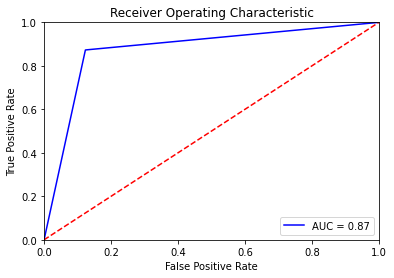

In [63]:
probs = dt.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Using cross validation:

In [64]:
# cross validation
scores = cross_val_score(dt, train_df, y, cv=5)
print ("Cross-validated scores for each fold :", scores)
print ("The mean accuracy of all 5 folds", scores.mean())

Cross-validated scores for each fold : [1. 1. 1. 1. 1.]
The mean accuracy of all 5 folds 1.0


## Support Vector Machines:

In [65]:
svc =  LinearSVC(class_weight='balanced') 
%time svc.fit(X_train, y_train)

y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)
svc_accuracy =accuracy_score(y_test, y_pred_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",svc_accuracy)

CPU times: total: 500 ms
Wall time: 530 ms

Training Accuracy score: 0.9074609375
Testing Accuracy score: 0.91


C:\Users\aorus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Confusion Matrix:


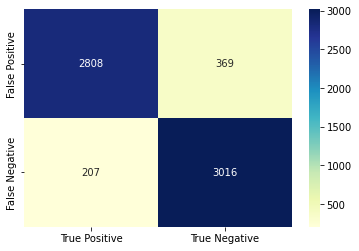

In [66]:
cm = confusion_matrix(y_test, y_pred_test)


cm_matrix = pd.DataFrame(data=cm, columns=['True Positive', 'True Negative'], 
                        index=['False Positive', 'False Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

### Classification Report:

In [67]:
print(classification_report(y_test, y_pred_test, 
                            target_names=['Non-clickbait', 'Clickbait']))

               precision    recall  f1-score   support

Non-clickbait       0.93      0.88      0.91      3177
    Clickbait       0.89      0.94      0.91      3223

     accuracy                           0.91      6400
    macro avg       0.91      0.91      0.91      6400
 weighted avg       0.91      0.91      0.91      6400



### AUC:

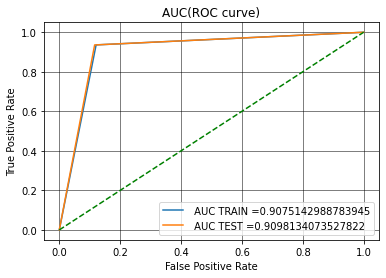

In [68]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_pred_train)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_pred_test)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

### Using cross validation:

In [69]:
# cross validation
scores = cross_val_score(svc, train_df, y, cv=5)
print ("Cross-validated scores for each fold :", scores)
print ("The mean accuracy of all 5 folds", scores.mean())

C:\Users\aorus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aorus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aorus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\aorus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Cross-validated scores for each fold : [1. 1. 1. 1. 1.]
The mean accuracy of all 5 folds 1.0


C:\Users\aorus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Perceptron:

In [70]:
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
Perceptron()
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
per_score = accuracy_score(y_test, y_pred_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",per_score)



Training Accuracy score: 0.908984375
Testing Accuracy score: 0.91140625


### Confusion Matrix:

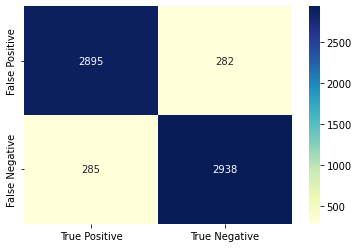

In [71]:
cm = confusion_matrix(y_test, y_pred_test)


cm_matrix = pd.DataFrame(data=cm, columns=['True Positive', 'True Negative'], 
                        index=['False Positive', 'False Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

### Classification Report:

In [72]:
print(classification_report(y_test, y_pred_test, 
                            target_names=['Non-clickbait', 'Clickbait']))

               precision    recall  f1-score   support

Non-clickbait       0.91      0.91      0.91      3177
    Clickbait       0.91      0.91      0.91      3223

     accuracy                           0.91      6400
    macro avg       0.91      0.91      0.91      6400
 weighted avg       0.91      0.91      0.91      6400



### AUC:

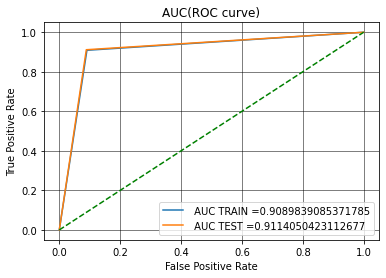

In [73]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_pred_train)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_pred_test)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

### Using cross validation:

In [74]:
# cross validation
scores = cross_val_score(clf, train_df, y, cv=5)
print ("Cross-validated scores for each fold :", scores)
print ("The mean accuracy of all 5 folds", scores.mean())

Cross-validated scores for each fold : [0.87984375 0.91203125 0.90390625 0.8746875  0.9146875 ]
The mean accuracy of all 5 folds 0.8970312500000001


## Random Forest:

In [75]:
rfmodel=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=seed)
rfmodel.fit(X_train,y_train)

rf_pred = rfmodel.predict(X_test)

rf_accuracy=round(accuracy_score(y_test,rf_pred),2)
rf_accuracy

0.91

### Confusion Matrix:

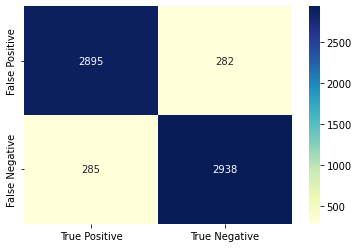

In [76]:
cm = confusion_matrix(y_test, y_pred_test)


cm_matrix = pd.DataFrame(data=cm, columns=['True Positive', 'True Negative'], 
                        index=['False Positive', 'False Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

### Classification Report:

In [77]:
print(classification_report(y_test, y_pred_test, 
                            target_names=['Non-clickbait', 'Clickbait']))

               precision    recall  f1-score   support

Non-clickbait       0.91      0.91      0.91      3177
    Clickbait       0.91      0.91      0.91      3223

     accuracy                           0.91      6400
    macro avg       0.91      0.91      0.91      6400
 weighted avg       0.91      0.91      0.91      6400



### AUC:

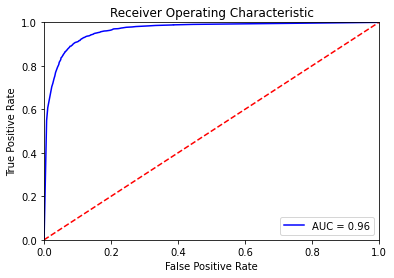

In [78]:
probs = rfmodel.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Using cross validation:

In [79]:
# cross validation
scores = cross_val_score(rfmodel, train_df, y, cv=5)
print ("Cross-validated scores for each fold :", scores)
print ("The mean accuracy of all 5 folds", scores.mean())

Cross-validated scores for each fold : [1. 1. 1. 1. 1.]
The mean accuracy of all 5 folds 1.0


In [80]:
Model_Comparison=pd.DataFrame({
    'Model':['GaussianNB','MultinomialNB','Perceptron','Support Vector Machine',
             'K-Nearest Neighbor','Decision Tree','Random Forest'],
    'Score':[gnb_score,mnb_score,per_score,svc_accuracy,acc_test,
              dt_score,rf_accuracy]})
Model_Comparison_df= Model_Comparison.sort_values(by='Score',ascending=False)
Model_Comparison_df=Model_Comparison_df.set_index('Score')
Model_Comparison_df.reset_index()

,Score,Model
0,0.911875,MultinomialNB
1,0.911875,K-Nearest Neighbor
2,0.911406,Perceptron
3,0.910000,Support Vector Machine
4,0.910000,Random Forest
5,0.874687,Decision Tree
6,0.832812,GaussianNB
